## Maestría en Inteligencia Artificial Aplicada
* Curso: Ciencia y analítica de datos
* Tecnológico de Monterrey
* Prof Maria Paz Rico
* Reto_Entrega2
### Nombres y matrículas de los integrantes del equipo:
* Andres Javier Galindo Vargas - A01793927
* Carlos Jesús Peñaloza Julio - A01793931

Noviembre 18,  2022

In [ ]:
!pip install patool

! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Librerías
import patoolib as pt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns   

import geopandas as gpd
from shapely.geometry import Point

from sklearn.cluster import KMeans

import folium # plotting library
from folium import plugins

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors



In [ ]:
#Bajar los datos: Base de datos de calidad de agua
!wget 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
pt.extract_archive('Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip')

--2022-11-19 03:50:26--  http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
Connecting to 201.116.60.46:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2556825 (2.4M) [application/x-zip-compressed]
Saving to: ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.1’

Datos_de_calidad_de 100%[===================>]   2.44M  2.70MB/s    in 0.9s    

2022-11-19 03:50:27 (2.70 MB/s) - ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip.1’ saved [2556825/2556825]

patool: Extracting Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip ...
patool: running /usr/bin/7z x -o./Unpack_nwxhfg6j -- Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
patool: ... Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip extracted to `Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo' (local file exists).


'Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo'

In [ ]:
#Leer archivo
file = 'Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df = pd.read_csv(file, encoding = 'latin1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
#El conjunto de datos muestra la siguiente información:

#shape
print('Shape: ', df.shape)
#columns
print('Columns: ',df.columns)
#dtypes
print('Dtypes: ',df.dtypes)

Shape:  (1068, 57)
Columns:  Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'C

In [ ]:
#Revisamos cuántos datos nulos tenemos en el conjunto
df.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [ ]:
#Teniendo en cuenta los tipos de variables del conjunto de datos, procedemos a revisar la estadística descriptiva

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.17418,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.61719,25.510285,32.677713
PERIODO,1068.0,2020.000000,0.000000,2020.00000,2020.000000,2020.00000,2020.000000,2020.000000
ALC_mg/L,1064.0,235.633759,116.874291,26.64000,164.000000,215.52750,292.710000,1650.000000
CONDUCT_mS/cm,1062.0,1138.953013,1245.563674,50.40000,501.750000,815.00000,1322.750000,18577.000000
SDT_mg/L,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La estadística descriptiva como sabemos, nos toma las variables numéricas, de las mostradas podemos ver que la Alcalinidad tiene una media importante en 235 mg/L, valor cercano al segundo cuartil.

In [ ]:
#Dado que se identificaron datos nulos, se procede a ordenarlos para un mejor análisis

df.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

#LIMPIEZA DE DATOS NULOS

In [ ]:
#Total de registros vs registros nulos 
print('El total de datos es de: ' + str(df.shape[0]) +
      '\nEl total de datos nulos es de: ' + str(df.isna().sum().sum()))
#Porcentaje de registros nulos
#Porcentaje de registros nulos
print('Los datos nulos representan el ' + str(round(df.isna().sum().sum()/df.shape[0] * 100,2)) + '% del total de los valores')

El total de datos es de: 1068
El total de datos nulos es de: 1532
Los datos nulos representan el 143.45% del total de los valores


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
datos_nul = df[df.isnull().any(axis=1)].shape[0]

In [ ]:
print('El total de datos es de: ' + str(df.shape[0]) +
      '\nEl total de datos nulos es de: ' + str(datos_nul))
#Porcentaje de registros nulos
print('Los datos nulos representan el ' + str(round(datos_nul/df.shape[0] * 100,2)) + '% del total de los valores')

El total de datos es de: 1068
El total de datos nulos es de: 1068
Los datos nulos representan el 100.0% del total de los valores


In [ ]:
df.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [ ]:
df_imp = df.copy()
df_sin_nulos = df.copy()

In [ ]:
df_sin_nulos.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
#Eliminando los registros que tengan datos nulos
df_sin_nulos.dropna(inplace=True) 
df_sin_nulos.shape

(0, 57)

In [ ]:
df_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 0 non-null      object 
 1   SITIO                 0 non-null      object 
 2   ORGANISMO_DE_CUENCA   0 non-null      object 
 3   ESTADO                0 non-null      object 
 4   MUNICIPIO             0 non-null      object 
 5   ACUIFERO              0 non-null      object 
 6   SUBTIPO               0 non-null      object 
 7   LONGITUD              0 non-null      float64
 8   LATITUD               0 non-null      float64
 9   PERIODO               0 non-null      int64  
 10  ALC_mg/L              0 non-null      float64
 11  CALIDAD_ALC           0 non-null      object 
 12  CONDUCT_mS/cm         0 non-null      float64
 13  CALIDAD_CONDUC        0 non-null      object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L            0 non-null   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dc6165050>,
      dtype=object)

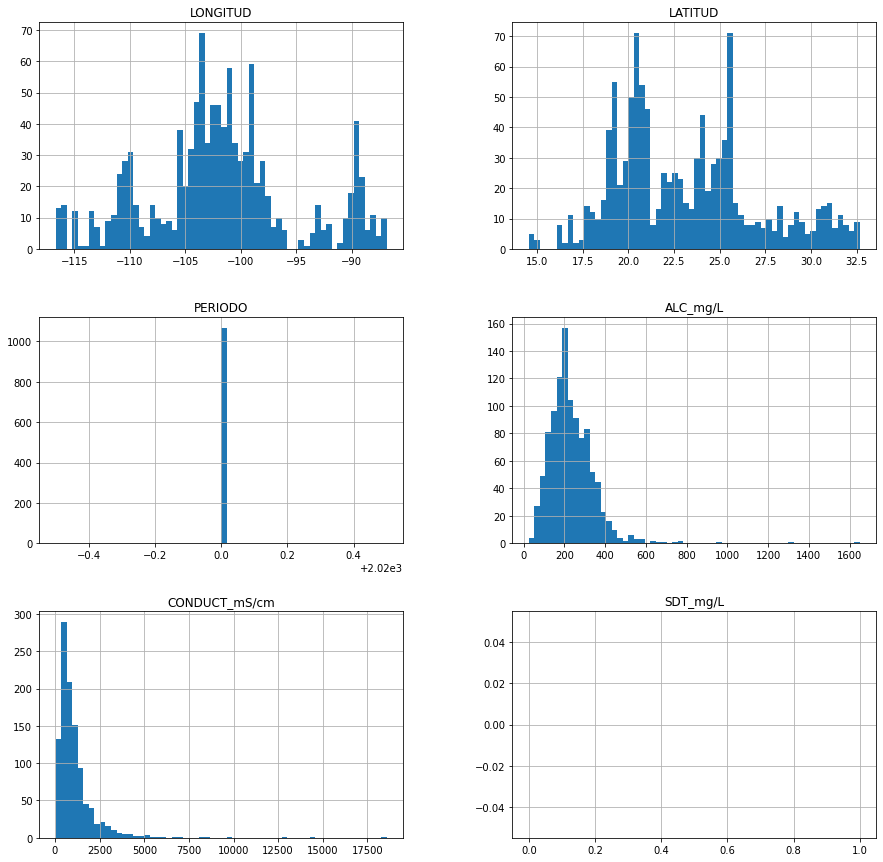

In [ ]:
#Imputación de datos
df.hist(bins = 60, figsize=(15,15))

#VARIABLES CATEGÓRICAS Y NUMÉRICAS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [ ]:
df.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

#VARIABLES CATEGÓRICAS

In [ ]:
lista_cat = list(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO','ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'CALIDAD_ALC',
       'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_FLUO','CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS',
       'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN','CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_ALC',
       'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3',
       'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG','CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE'])
lista_num = list(['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                  'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'])

lista_cat

['CLAVE',
 'SITIO',
 'ORGANISMO_DE_CUENCA',
 'ESTADO',
 'MUNICIPIO',
 'ACUIFERO',
 'SUBTIPO',
 'LONGITUD',
 'LATITUD',
 'PERIODO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO',
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE',
 'SEMAFORO',
 'CONTAMINANTES',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE']

In [ ]:
lista_num = list(['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                  'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'])
lista_num

['ALC_mg/L',
 'CONDUCT_mS/cm',
 'SDT_mg/L',
 'SDT_M_mg/L',
 'FLUORUROS_mg/L',
 'DUR_mg/L',
 'COLI_FEC_NMP/100_mL',
 'N_NO3_mg/L',
 'AS_TOT_mg/L',
 'CD_TOT_mg/L',
 'CR_TOT_mg/L',
 'HG_TOT_mg/L',
 'PB_TOT_mg/L',
 'MN_TOT_mg/L',
 'FE_TOT_mg/L']

In [ ]:
df_imp_cat = df_imp[lista_cat]
df_imp_cat.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,Alta,Permisible para riego,Cultivos sensibles,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Buena calidad,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Alta,Potable - Dura,Potable - Excelente,Potable - Excelente,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,Alta,Buena para riego,Excelente para riego,Potable - Dulce,Potable - Optima,Potable - Dura,Potable - Excelente,Potable - Excelente,Apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,Alta,Permisible para riego,Cultivos con manejo especial,Ligeramente salobres,Baja,Potable - Dura,Aceptable,No apta como FAAP,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
df_imp_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  CALIDAD_ALC           1064 non-null   object 
 11  CALIDAD_CONDUC        1062 non-null   object 
 12  CALIDAD_SDT_ra        1066 non-null   object 
 13  CALIDAD_SDT_salin     1066 non-null   object 
 14  CALIDAD_FLUO          1068 non-null   object 
 15  CALIDAD_DUR          

#VARIABLES NUMÉRICAS

In [ ]:
#Definimos las variables numéricas, aquí se tiene en cuenta la eliminación de la columna SDT_mg/L debido a que los datos en esta son nulos
df_imp_num = df_imp.drop(df_imp_cat.columns,axis=1)
df_imp_num.drop(axis=1,columns='SDT_mg/L',inplace=True)
df_imp_num.head()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025


In [ ]:
lista_cat = df_imp_cat.columns
lista_num = df_imp_num.columns

In [ ]:
lista_total=[*lista_cat,*lista_num]
lista_total

['CLAVE',
 'SITIO',
 'ORGANISMO_DE_CUENCA',
 'ESTADO',
 'MUNICIPIO',
 'ACUIFERO',
 'SUBTIPO',
 'LONGITUD',
 'LATITUD',
 'PERIODO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO',
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_MN',
 'CALIDAD_FE',
 'SEMAFORO',
 'CONTAMINANTES',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE',
 'ALC_mg/L',
 'CONDUCT_mS/cm',
 'SDT_M_mg/L',
 'FLUORUROS_mg/L',
 'DUR_mg/L',
 'COLI_FEC_NMP/100_mL',
 'N_NO3_mg/L',
 'AS_TOT_mg/L',
 'CD_TOT_mg/L',
 'CR_TOT_mg/L',
 'HG_TOT_mg/L',
 'PB_TOT_mg/L',
 'MN_TOT_mg/L',
 'FE_TOT_mg/L']

In [ ]:
print('Variables categóricas: ', lista_cat)
print('--------------------------------')
print('Variables numéricas: ', lista_num)

Variables categóricas:  Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'CALIDAD_ALC',
       'CALIDAD_CONDUC', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'CALIDAD_FLUO',
       'CALIDAD_DUR', 'CALIDAD_COLI_FEC', 'CALIDAD_N_NO3', 'CALIDAD_AS',
       'CALIDAD_CD', 'CALIDAD_CR', 'CALIDAD_HG', 'CALIDAD_PB', 'CALIDAD_MN',
       'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_ALC',
       'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin',
       'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3',
       'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG',
       'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE'],
      dtype='object')
--------------------------------
Variables numéricas:  Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TO

In [ ]:
df_imp_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   object 
 3   FLUORUROS_mg/L       1068 non-null   object 
 4   DUR_mg/L             1067 non-null   object 
 5   COLI_FEC_NMP/100_mL  1068 non-null   object 
 6   N_NO3_mg/L           1067 non-null   object 
 7   AS_TOT_mg/L          1068 non-null   object 
 8   CD_TOT_mg/L          1068 non-null   object 
 9   CR_TOT_mg/L          1068 non-null   object 
 10  HG_TOT_mg/L          1068 non-null   object 
 11  PB_TOT_mg/L          1068 non-null   object 
 12  MN_TOT_mg/L          1068 non-null   object 
 13  FE_TOT_mg/L          1068 non-null   object 
dtypes: float64(2), object(12)
memory usage: 116.9+ KB


In [ ]:
#Teniendo en cuenta que se evidencian variables tipo objeto, se procederá con la conversión a flotante
for name in lista_num:
  df_imp_num[name] = df_imp_num[name].astype('str')
  df_imp_num[name] = df_imp_num[name].str.replace('<25','25') 
  df_imp_num[name] = df_imp_num[name].str.replace('<0.2','0.2') 
  df_imp_num[name] = df_imp_num[name].str.replace('<20','20') 
  df_imp_num[name] = df_imp_num[name].str.replace('<1.1','1.1')
  df_imp_num[name] = df_imp_num[name].str.replace('<0.02','0.02') 
  df_imp_num[name] = df_imp_num[name].str.replace('<0.01','0.01') 
  df_imp_num[name] = df_imp_num[name].str.replace('<0.003','0.003')
  df_imp_num[name] = df_imp_num[name].str.replace('<0.005','0.004') 
  df_imp_num[name] = df_imp_num[name].str.replace('<0.0005','0.0004') 
  df_imp_num[name] = df_imp_num[name].str.replace('<0.0015','0.0015') 
  df_imp_num[name] = df_imp_num[name].str.replace('<0.025','0.025')  
  df_imp_num[name]= df_imp_num[name].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of reg

In [ ]:
df_imp_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


In [ ]:
df_imp_num

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.004,0.0004,0.004,0.00150,0.08910
1,231.990,608.0,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.004,0.0004,0.004,0.00150,0.02500
2,204.920,532.0,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.004,0.0004,0.004,0.00150,0.02500
3,327.000,686.0,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0004,0.004,0.00150,0.02500
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.004,0.0004,0.004,0.00150,0.02500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.004,0.0004,0.004,0.00150,0.02500
1064,256.000,529.0,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.004,0.0004,0.004,0.00709,0.07578
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.004,0.0004,0.004,0.02420,0.21290
1066,193.140,873.0,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.004,0.0004,0.004,0.01200,0.17860


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False)

cat_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='most_frequent'))
])

num_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='median'))
])

In [ ]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("cat", cat_pipeline, lista_cat),
    ("num", num_pipeline, lista_num)
], remainder='passthrough');

In [ ]:
lista_num_new = list(['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'])

In [ ]:
for name in lista_num_new:
  mediana = df_imp_num[name].median() 
  df_imp_num[name]= df_imp_num[name].replace(np.nan, mediana)

df_imp_num.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


# ENTREGA 2

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from IPython.utils import io
from sklearn.tree import DecisionTreeClassifier  
#from sklearn.ensemble import RandomForestClassifier
#from random_forest import RandomForest
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score 
from scipy.stats import alpha
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pydotplus 
from IPython.display import Image

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

import numpy as np
from IPython.display import display
import matplotlib as pl
import sklearn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
df_imp_num

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.004,0.0004,0.004,0.00150,0.08910
1,231.990,608.0,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.004,0.0004,0.004,0.00150,0.02500
2,204.920,532.0,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.004,0.0004,0.004,0.00150,0.02500
3,327.000,686.0,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0004,0.004,0.00150,0.02500
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.004,0.0004,0.004,0.00150,0.02500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.004,0.0004,0.004,0.00150,0.02500
1064,256.000,529.0,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.004,0.0004,0.004,0.00709,0.07578
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.004,0.0004,0.004,0.02420,0.21290
1066,193.140,873.0,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.004,0.0004,0.004,0.01200,0.17860


In [ ]:
# Asignamos X a las variables de entrada y definimos la variable de salida 'SEMAFORO' 
#X, y = df_imp.iloc[:,:-1], df_imp.iloc[:,-1]
X, y = df_imp_num.iloc[:,:-1], df_imp_cat[['SEMAFORO']]

#Hacemos la partición de datos con 85% para el conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 530 to 684
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             907 non-null    float64
 1   CONDUCT_mS/cm        907 non-null    float64
 2   SDT_M_mg/L           907 non-null    float64
 3   FLUORUROS_mg/L       907 non-null    float64
 4   DUR_mg/L             907 non-null    float64
 5   COLI_FEC_NMP/100_mL  907 non-null    float64
 6   N_NO3_mg/L           907 non-null    float64
 7   AS_TOT_mg/L          907 non-null    float64
 8   CD_TOT_mg/L          907 non-null    float64
 9   CR_TOT_mg/L          907 non-null    float64
 10  HG_TOT_mg/L          907 non-null    float64
 11  PB_TOT_mg/L          907 non-null    float64
 12  MN_TOT_mg/L          907 non-null    float64
dtypes: float64(13)
memory usage: 99.2 KB


In [ ]:
print('Tamaño datos de Entrenamiento:', X_train.shape)
print('Tamaño datos de Prueba:', X_test.shape)

Tamaño datos de Entrenamiento: (907, 13)
Tamaño datos de Prueba: (161, 13)


In [ ]:
# Lista de variables categóricas
lista_cat = list()


In [ ]:
#mode = X_train[lista_cat].mode().iloc[0]
#X_train[lista_cat] = X_train[lista_cat].fillna(value=mode)

In [ ]:
# Lista variables numéricas sin SDT_mg/L
lista_num_new

['ALC_mg/L',
 'CONDUCT_mS/cm',
 'SDT_M_mg/L',
 'FLUORUROS_mg/L',
 'DUR_mg/L',
 'COLI_FEC_NMP/100_mL',
 'N_NO3_mg/L',
 'AS_TOT_mg/L',
 'CD_TOT_mg/L',
 'CR_TOT_mg/L',
 'HG_TOT_mg/L',
 'PB_TOT_mg/L',
 'MN_TOT_mg/L',
 'FE_TOT_mg/L']

**ARBOL DE DECISIÓN**

In [ ]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9316770186335404

Buscamos el mejor clasificador, aquí usaremos el criterio "gini" y "entropy"

In [ ]:
#Usando el criterio "gini"
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
#Usando el criterio "entropy"
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
y_pred = clf_gini.predict(X_test)
y_pred

array(['Verde', 'Rojo', 'Verde', 'Verde', 'Amarillo', 'Verde', 'Verde',
       'Verde', 'Rojo', 'Amarillo', 'Rojo', 'Verde', 'Verde', 'Verde',
       'Verde', 'Amarillo', 'Verde', 'Verde', 'Rojo', 'Verde', 'Verde',
       'Amarillo', 'Rojo', 'Verde', 'Rojo', 'Amarillo', 'Amarillo',
       'Verde', 'Verde', 'Rojo', 'Verde', 'Rojo', 'Amarillo', 'Verde',
       'Verde', 'Rojo', 'Rojo', 'Verde', 'Verde', 'Verde', 'Verde',
       'Verde', 'Amarillo', 'Rojo', 'Verde', 'Amarillo', 'Rojo', 'Verde',
       'Rojo', 'Verde', 'Verde', 'Verde', 'Amarillo', 'Verde', 'Verde',
       'Verde', 'Amarillo', 'Verde', 'Rojo', 'Verde', 'Rojo', 'Amarillo',
       'Rojo', 'Rojo', 'Verde', 'Verde', 'Verde', 'Verde', 'Verde',
       'Rojo', 'Verde', 'Verde', 'Amarillo', 'Rojo', 'Rojo', 'Verde',
       'Verde', 'Rojo', 'Verde', 'Rojo', 'Verde', 'Amarillo', 'Verde',
       'Verde', 'Verde', 'Verde', 'Amarillo', 'Amarillo', 'Amarillo',
       'Verde', 'Verde', 'Rojo', 'Amarillo', 'Amarillo', 'Verde',
       'Amari

In [ ]:
#La precisión de la predicción de la variable de salida sería:
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

Accuracy is : 74.53416149068323


In [ ]:
#La matriz de confusión sería:
cm = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(cm) 

Confusion Matrix :
[[25  1  9]
 [ 6 39 23]
 [ 0  2 56]]


In [ ]:
def cm_model(modelo,X,y,X_test,y_test):

    modelo.fit(X, y)

    yhat = modelo.predict(X_test)

    cm = confusion_matrix(y_test, yhat)

    txt = ['P0,0','P0,1','P0,2',
          'P1,0','P1,1','P1,2',
          'P2,0','P2,1','P2,2',]
    frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
    porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
    labels = np.asarray(labels).reshape(3,3)
    labels
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', cbar=False)
    ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
    plt.show()


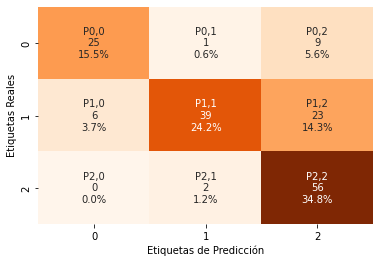

In [ ]:
cm_model(clf_gini,X_train,np.ravel(y_train),X_test,np.ravel(y_test))

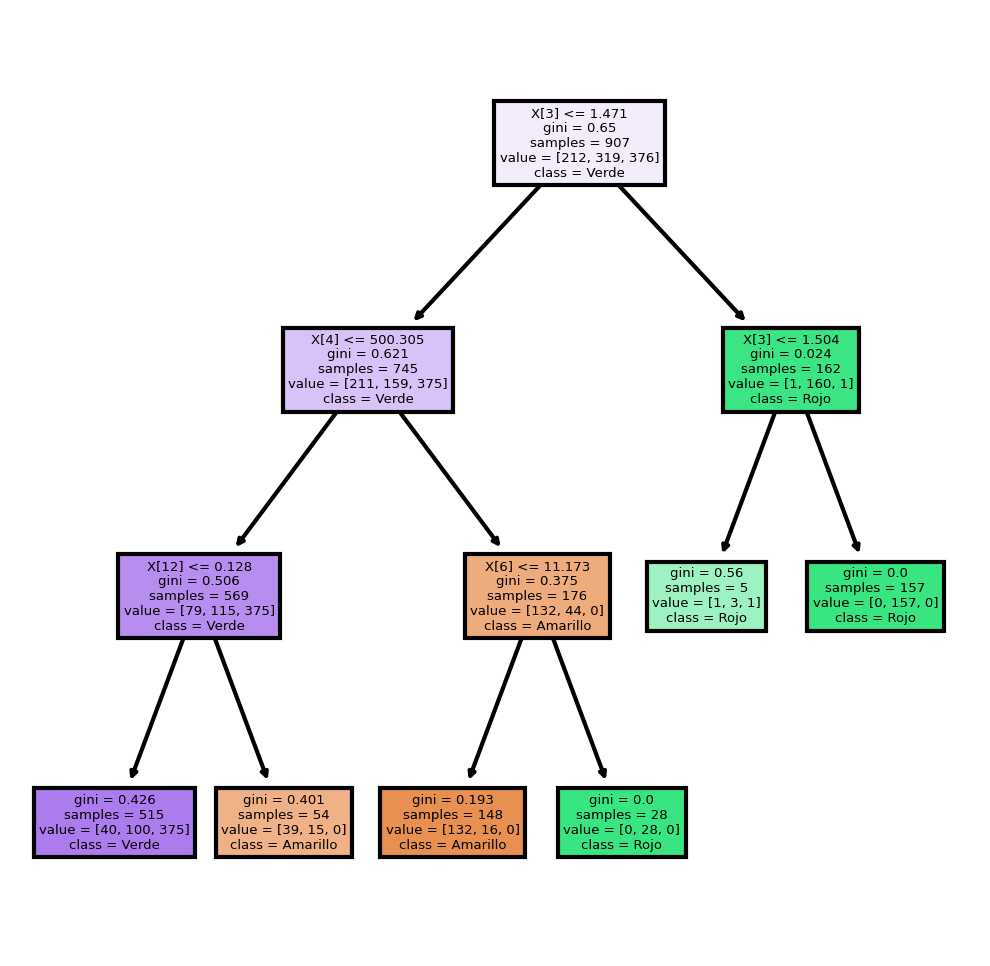

In [ ]:
#Graficamos el árbol
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf_gini, class_names=np.unique(y).astype('str'),
               filled = True)
plt.show();

In [ ]:
# Medición del performance del clasificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Amarillo       0.81      0.71      0.76        35
        Rojo       0.93      0.57      0.71        68
       Verde       0.64      0.97      0.77        58

    accuracy                           0.75       161
   macro avg       0.79      0.75      0.74       161
weighted avg       0.80      0.75      0.74       161



**RANDOM FOREST**

In [ ]:
# Entrenamos el modelo
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=10, max_depth=7)
#clf2.train(X_train, y_train, X_test)
clf2.fit(X_train,y_train)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=7, n_estimators=10)

In [ ]:
y_pred2 = clf2.predict(X_test)
y_pred2


array(['Verde', 'Rojo', 'Rojo', 'Rojo', 'Amarillo', 'Verde', 'Verde',
       'Verde', 'Rojo', 'Rojo', 'Rojo', 'Rojo', 'Verde', 'Verde', 'Verde',
       'Rojo', 'Verde', 'Verde', 'Rojo', 'Verde', 'Rojo', 'Amarillo',
       'Rojo', 'Amarillo', 'Rojo', 'Amarillo', 'Amarillo', 'Verde',
       'Verde', 'Rojo', 'Verde', 'Rojo', 'Amarillo', 'Verde', 'Verde',
       'Rojo', 'Rojo', 'Verde', 'Rojo', 'Verde', 'Verde', 'Verde',
       'Amarillo', 'Rojo', 'Verde', 'Amarillo', 'Rojo', 'Verde', 'Rojo',
       'Verde', 'Verde', 'Amarillo', 'Amarillo', 'Verde', 'Rojo', 'Verde',
       'Amarillo', 'Rojo', 'Verde', 'Verde', 'Rojo', 'Rojo', 'Rojo',
       'Rojo', 'Verde', 'Verde', 'Verde', 'Amarillo', 'Rojo', 'Rojo',
       'Verde', 'Verde', 'Rojo', 'Rojo', 'Rojo', 'Verde', 'Verde', 'Rojo',
       'Verde', 'Rojo', 'Verde', 'Amarillo', 'Rojo', 'Verde', 'Verde',
       'Rojo', 'Amarillo', 'Amarillo', 'Amarillo', 'Verde', 'Verde',
       'Rojo', 'Amarillo', 'Amarillo', 'Rojo', 'Amarillo', 'Amarillo',
      

In [ ]:
#La precisión de la predicción de la variable de salida sería:
y_pred2 = clf2.predict(X_test)
accuracy_score(y_pred2,y_test)
print ("Accuracy is :", accuracy_score(y_test,y_pred2)*100)

Accuracy is : 93.7888198757764


In [ ]:
#La matriz de confusión sería:
cm2 = confusion_matrix(y_test, y_pred2) 
print ('Confusion Matrix :')
print(cm2) 

Confusion Matrix :
[[28  1  6]
 [ 1 65  2]
 [ 0  0 58]]


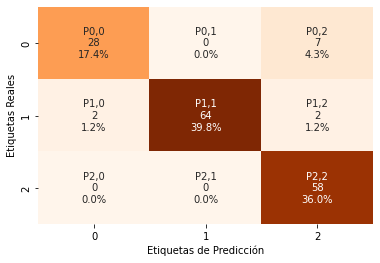

In [ ]:
cm_model(clf2,X_train,np.ravel(y_train),X_test,np.ravel(y_test))

In [ ]:
# Medición del performance del clasificador
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

    Amarillo       0.97      0.80      0.88        35
        Rojo       0.98      0.96      0.97        68
       Verde       0.88      1.00      0.94        58

    accuracy                           0.94       161
   macro avg       0.94      0.92      0.93       161
weighted avg       0.94      0.94      0.94       161



**FEATURES IMPORTANCES**

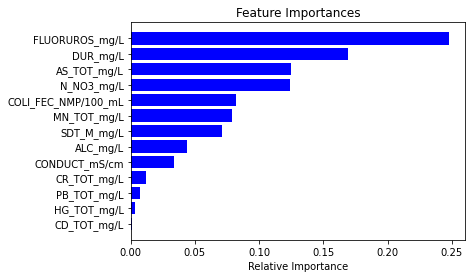

In [ ]:
importances = clf2.feature_importances_
indices = np.argsort(importances)
features= X_test.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**CONCLUSIONES:**

Luego de realizar el anterior ejercicio se pudieron afianzar los conocimientos relacionados con dos modelos de clasificación muy usados. 

El despliegue permitió evidenciar que el accuracy al aplicar el Decision Tree fue del 74.5% mientras que con Random Forest fue de 93.8%. De acuerdo con esos resultados el mejor modelo de clasificación evidentemente sería el de Random Forest.

Para una mejor visualización se realizaron las matrices de confusión para cada uno:

Confusion Matrix DT:
[[25  1  9]
 [ 6 39 23]
 [ 0  2 56]]

 Confusion Matrix RF:
[[27  1  7]
 [ 1 60  7]
 [ 0  0 58]]

De acuerdo con la definición de la matriz de confusión, el objetivo es evaluar la relación entre clases y se puede confirmar que el modelo RF cumple con una mejor predicción. En la misma línea de análisis está la medición del performance de cada modelo, aquí se evidencia que la métrica **Recall** presenta el mejor resultado cuando se trata de predecir el semáforo en verde para ambos modelos llegando al 100% para el RF y 97% para DT. Sin embargo, la métrica **Precision** tiene mejor respuesta cuando se trata de predecir el semáforo en amarillo o rojo especialmente en el modelo de RF.

Analizando los features importances, el modelo arrojó 13 features siendo el de FLUORUROS el de mayor participación por encima del 25% seguido de la variable DUR con 15% y AS TOT con 13%. A tener en cuenta, "la OMS recomienda el valor de referencia para el fluoruro en el agua potable en 1.5 mg/L" (OMS, 1993, 1996b)

**Referencia bibliográfica:**

Flúor en el agua de consumo. Recuperado de: https://www3.paho.org/hq/index.php?option=com_content&view=article&id=8193:2013-fluor-agua-consumo&Itemid=39798&lang=es#gsc.tab=0

sklearn.metrics.classification_report. Recuperado de: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html 